In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn import ensemble

In [2]:
#loading data for regression
data_earthquakes = pd.read_csv('data_for_regression.csv')

X = data_earthquakes[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Distance']]
y = data_earthquakes['Days-till-eruption']

Traget data:

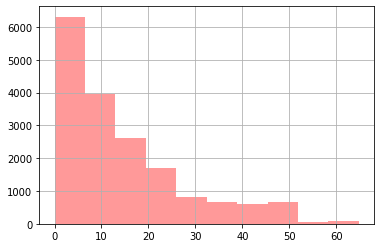

In [3]:
y.hist(color = 'red', alpha = 0.4)

In [4]:
X_train_validation, X_test, y_train_validation, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

# standardization    
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_validation)
X_train_validation = scaler.transform(X_train_validation)
X_test = scaler.transform(X_test)


Using grid search to find the optimal hyperparameters of a model

In [5]:
grid_model = ensemble.RandomForestRegressor()

params = {
    'n_estimators': range(54, 58), 
    'max_depth': range(44, 48)
}

grid = model_selection.GridSearchCV(grid_model, param_grid=params, scoring='r2', cv=10, return_train_score=True)
grid.fit(X_train_validation, y_train_validation)

print('Best r2 score: ', grid.best_score_)
print('Best parameters: \n\tn_estimators: ', grid.best_params_['n_estimators'], 
      '\n\tmax_depth: ', grid.best_params_['max_depth'])


Best r2 score:  0.5166017199140822
Best parameters: 
	n_estimators:  57 
	max_depth:  44


Testing model with optimal parameters

In [6]:
model = ensemble.RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'], 
                                       max_depth=grid.best_params_['max_depth'])

model.fit(X_train_validation, y_train_validation)
y_test_predicted = model.predict(X_test)
y_train_predicted = model.predict(X_train_validation)

print('Test results')
print('r2_score: ', metrics.r2_score(y_test, y_test_predicted))
print('RMSE: ', metrics.mean_squared_error(y_test, y_test_predicted, squared=False))

print('\n\nTrain results')
print('r2_score: ', metrics.r2_score(y_train_validation, y_train_predicted))
print('RMSE: ', metrics.mean_squared_error(y_train_validation, y_train_predicted, squared=False))

Test results
r2_score:  0.5817374640547528
RMSE:  8.781238113273762


Train results
r2_score:  0.9356006737123899
RMSE:  3.4415401909555743


Cross validation on model with optimal parameters

In [7]:
kf = model_selection.KFold(n_splits=5)

model = ensemble.RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'], 
                                        max_depth=grid.best_params_['max_depth'])

scores = model_selection.cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)
print('\nCross validation mean neg RMSE score: ', scores.mean())


Cross validation mean neg RMSE score:  -14.599675149748375
